In [1]:
import numpy as np
dataset = np.load('pca_data.npz')

In [2]:
matrix = np.array(dataset['data'])

In [4]:
print(matrix.shape)

(300, 2)


In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit_transform(matrix)

# Please scroll to the next page for the remaining outputs and code

array([[ 1.02167484e+00, -4.42142940e-01],
       [ 1.44724673e+00, -3.34881369e-01],
       [ 1.89490668e+00,  2.80665612e-01],
       [ 1.77574944e+00,  8.79567707e-02],
       [ 9.27672449e-01,  4.73393195e-01],
       [-2.76852673e-01,  2.28096398e-01],
       [-1.71570067e+00,  5.72357921e-01],
       [-1.58580854e+00,  2.23381383e-01],
       [ 1.16645706e+00, -2.70160645e-01],
       [-3.46146563e+00,  1.13662546e-02],
       [ 1.98358929e-02,  1.02104703e+00],
       [-6.58109819e-01, -4.74736090e-02],
       [-1.38195893e+00, -1.16921627e-01],
       [-1.07531948e+00, -3.92500952e-01],
       [-1.22891985e+00,  2.08851139e-01],
       [ 7.34442546e-01, -1.43612696e-01],
       [-1.40388525e+00, -5.07938304e-01],
       [-1.44947735e+00, -1.18131393e+00],
       [-1.10691817e+00,  3.49065107e-01],
       [-1.00319925e-02, -6.85407427e-02],
       [-9.05414989e-01,  2.34049330e-01],
       [ 2.39724058e+00,  7.57999062e-01],
       [ 1.03904014e+00, -4.16805752e-01],
       [-4.

In [6]:
print(pca.components_)

[[-0.83774478 -0.54606197]
 [-0.54606197  0.83774478]]


In [7]:
def pca(X, n_components):
    # Standardize the data (mean centering)
    X_mean = np.mean(X, axis=0)
    X_centered = X - X_mean
    # Calculate the covariance matrix
    cov_matrix = np.cov(X_centered, rowvar=False)
    # Calculate the eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
    # Sort the eigenvalues in descending order and get the corresponding eigenvectors
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]
    eigenvectors = eigenvectors * (-np.sign(eigenvectors[0]))
    # Select the top 'n_components' eigenvectors
    top_eigenvectors = eigenvectors[:, :n_components]
    pca_data = np.dot(X_centered, top_eigenvectors)
    
    return pca_data

In [8]:
pca_result = pca(matrix, n_components=2)
print(pca_result)

[[ 1.02167484e+00 -4.42142940e-01]
 [ 1.44724673e+00 -3.34881369e-01]
 [ 1.89490668e+00  2.80665612e-01]
 [ 1.77574944e+00  8.79567707e-02]
 [ 9.27672449e-01  4.73393195e-01]
 [-2.76852673e-01  2.28096398e-01]
 [-1.71570067e+00  5.72357921e-01]
 [-1.58580854e+00  2.23381383e-01]
 [ 1.16645706e+00 -2.70160645e-01]
 [-3.46146563e+00  1.13662546e-02]
 [ 1.98358929e-02  1.02104703e+00]
 [-6.58109819e-01 -4.74736090e-02]
 [-1.38195893e+00 -1.16921627e-01]
 [-1.07531948e+00 -3.92500952e-01]
 [-1.22891985e+00  2.08851139e-01]
 [ 7.34442546e-01 -1.43612696e-01]
 [-1.40388525e+00 -5.07938304e-01]
 [-1.44947735e+00 -1.18131393e+00]
 [-1.10691817e+00  3.49065107e-01]
 [-1.00319925e-02 -6.85407427e-02]
 [-9.05414989e-01  2.34049330e-01]
 [ 2.39724058e+00  7.57999062e-01]
 [ 1.03904014e+00 -4.16805752e-01]
 [-4.21279130e-01 -2.65895399e-01]
 [-2.36777606e+00 -2.59605729e-01]
 [-1.98401946e+00  4.58364604e-01]
 [ 9.61665933e-01  5.19535524e-01]
 [-2.41540230e+00 -3.95724594e-01]
 [-4.93022545e+00  1

In [10]:
import matplotlib.pyplot as plt

[-0.83774478 -0.54606197]
[-0.54606197  0.83774478]


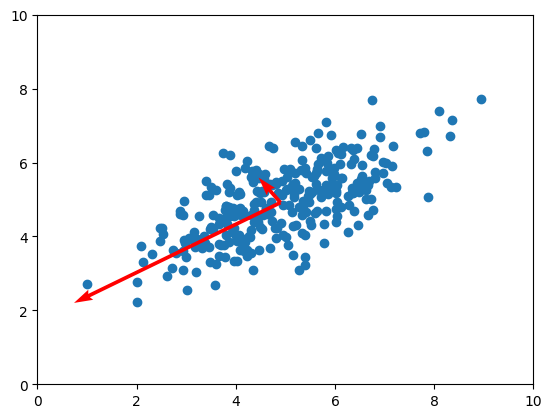

In [36]:
x = [row[0] for row in matrix]
y = [row[1] for row in matrix]
plt.scatter(x, y)    
plt.ylim(0,10)
plt.xlim(0,10)

mean = np.mean(matrix, axis=0)

pca = PCA(n_components=2)
pca.fit_transform(matrix)
components = pca.components_
explained_variances = pca.explained_variance_



for i in range(len(components)):
    comp = components[i]
    print(comp)
    arrow_length = explained_variances[i]*2  # Length proportional to explained variance
    plt.quiver(
        mean[0],  # X-coordinate of the mean
        mean[1],  # Y-coordinate of the mean
        comp[0] * arrow_length,  # X-component of the arrow
        comp[1] * arrow_length,  # Y-component of the arrow
        angles='xy',
        scale_units='xy',
        scale=1,
        color=f'red',  # Color based on component
        label=f'PC {i + 1}: {explained_variances[i]:.2f} Explained Variance'
    )